In [64]:
# read csv file
import pandas as pd
rent = pd.read_csv('apartment+for+rent+classified/apartments_for_rent_classified_100K.csv', sep=';', encoding='latin-1')
rent.head()


/var/folders/t3/0dl4f5vn5vz1743r9_s9hd8m0000gn/T/ipykernel_60039/2815312392.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  rent = pd.read_csv('apartment+for+rent+classified/apartments_for_rent_classified_100K.csv', sep=';', encoding='latin-1')


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [65]:
# check for null values in every column
rent.isnull().sum()


id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     55354
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [66]:
# where amenities are null, put "None"
rent['amenities'] = rent['amenities'].fillna('None')
# Where bathrooms or bedrooms are "null", put 0
rent['bathrooms'] = rent['bathrooms'].fillna(0)
rent['bedrooms'] = rent['bedrooms'].fillna(0)
# where pets_allowed is null, put "None"
rent['pets_allowed'] = rent['pets_allowed'].fillna('None')
# drop title, body, address, columns
rent = rent.drop(['title', 'body', 'address'], axis=1)
# drop rows where longitude or latitude are null
rent = rent.dropna(subset=['longitude', 'latitude'])
# drop the rows where price is null
rent = rent.dropna(subset=['price'])


In [67]:
rent.head()

,id,category,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,None,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,None,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,None,2.0,3.0,USD,No,Thumbnail,None,1395.0,"$1,395",Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,None,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,None,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [68]:
# print the category of values in each column
for col in {'category', 'amenities',	'bathrooms', 	'bedrooms',	'currency',	'fee',	'has_photo',	'pets_allowed', 'price_type', 'cityname', 'state', 'source'}:
    print(col, rent[col].unique())

has_photo ['Thumbnail' 'No' 'Yes']
category ['housing/rent/apartment' 'housing/rent/home' 'housing/rent/short_term'
 'housing/rent' 'housing/rent/condo' 'housing/rent/other'
 'housing/rent/commercial/retail']
pets_allowed ['Cats' 'Cats,Dogs' 'None' 'Dogs' 'Cats,Dogs,None']
currency ['USD']
fee ['No' 'Yes']
source ['RentLingo' 'ListedBuy' 'RentDigs.com' 'RENTCafé' 'GoSection8' 'Listanza'
 'RealRentals' 'RENTOCULAR' 'tenantcloud' 'Real Estate Agent' 'rentbits'
 'Home Rentals' 'Nest Seekers' 'RentFeeder' 'vFlyer' 'Claz'
 'Real Estate Shows' 'Seattle Rentals' 'BostonApartments' 'SpreadMyAd'
 'Apartable' 'Z57' 'FreeAdsTime' 'AgentWebsite' 'HousesForRent']
price_type ['Monthly' 'Weekly' 'Monthly|Weekly']
state ['CA' 'VA' 'NC' 'NM' 'CO' 'WV' 'GA' 'MA' 'DC' 'AZ' 'IA' 'WA' 'TX' 'IL'
 'MS' 'OR' 'FL' 'MO' 'PA' 'WI' 'OK' 'UT' 'RI' 'NJ' 'IN' 'MD' 'OH' 'TN'
 'ND' 'NE' 'AR' 'MI' 'MN' 'HI' 'ID' 'SC' 'KS' 'AL' 'SD' 'NY' 'KY' 'LA'
 'AK' 'CT' 'NV' 'WY' 'VT' 'NH' 'MT' 'DE' nan 'ME']
cityname ['Redondo Bea

In [69]:
# drop currency
rent = rent.drop(['currency'], axis=1)

In [70]:
# print rows where price_type is not "monthly"
rent[rent['price_type'] != 'Monthly']

,id,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
6729,5659276240,housing/rent/apartment,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,No,Thumbnail,"Cats,Dogs",1560.0,"$1,560 Weekly",Weekly,200,New Bern,NC,35.0847,-77.0609,ListedBuy,1576618076
7245,5625835116,housing/rent/apartment,"Cable or Satellite,Pool,Refrigerator,Storage,TV",0.0,0.0,No,Thumbnail,"Cats,Dogs",275.0,$275 Monthly|Weekly,Monthly|Weekly,300,Lakeland,FL,28.0451,-81.9689,ListedBuy,1574891000
49908,5518370229,housing/rent/apartment,"AC,Fireplace,Patio/Deck,Pool,TV",4.0,4.0,No,No,None,8500.0,"$8,500 Weekly",Weekly,3600,East Hampton,NY,41.0020,-72.1796,Nest Seekers,1569318970
83395,5161839760,housing/rent/apartment,Elevator,2.5,2.0,No,Thumbnail,None,850.0,$850 Weekly,Weekly,2326,New York,NY,40.7247,-73.9545,SpreadMyAd,1547858154


In [71]:
# multiple price by 4 for those rows
rent.loc[rent['price_type'] != 'Monthly', 'price'] = rent['price'] * 4
rent[rent['price_type'] != 'Monthly']

,id,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
6729,5659276240,housing/rent/apartment,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,No,Thumbnail,"Cats,Dogs",6240.0,"$1,560 Weekly",Weekly,200,New Bern,NC,35.0847,-77.0609,ListedBuy,1576618076
7245,5625835116,housing/rent/apartment,"Cable or Satellite,Pool,Refrigerator,Storage,TV",0.0,0.0,No,Thumbnail,"Cats,Dogs",1100.0,$275 Monthly|Weekly,Monthly|Weekly,300,Lakeland,FL,28.0451,-81.9689,ListedBuy,1574891000
49908,5518370229,housing/rent/apartment,"AC,Fireplace,Patio/Deck,Pool,TV",4.0,4.0,No,No,None,34000.0,"$8,500 Weekly",Weekly,3600,East Hampton,NY,41.0020,-72.1796,Nest Seekers,1569318970
83395,5161839760,housing/rent/apartment,Elevator,2.5,2.0,No,Thumbnail,None,3400.0,$850 Weekly,Weekly,2326,New York,NY,40.7247,-73.9545,SpreadMyAd,1547858154


In [9]:
# drop price_display, price_type
rent = rent.drop(['price_display', 'price_type'], axis=1)

In [10]:
# strip housing/rent from category
rent['category'] = rent['category'].str.replace('housing/rent/', '')

In [11]:
# print all the unique values in amenities
amenities = set()
for row in rent['amenities']:
    for amenity in row.split(','):
        amenities.add(amenity.strip())
print(amenities)

{'Storage', 'Gated', 'AC', 'TV', 'Cable or Satellite', 'Doorman', 'Parking', 'Tennis', 'Fireplace', 'Clubhouse', 'Dishwasher', 'Garbage Disposal', 'Refrigerator', 'Alarm', 'Internet Access', 'Golf', 'Wood Floors', 'Patio/Deck', 'Elevator', 'None', 'Luxury', 'Washer Dryer', 'Hot Tub', 'View', 'Pool', 'Basketball', 'Gym', 'Playground'}


In [12]:
# add categorical columns for each amenity, skipping "None"
for amenity in amenities:
    if amenity != 'None':
        rent[amenity] = rent['amenities'].str.contains(amenity).astype(int)


In [13]:
# dummify category, has_photo, cityname, state, source
rent = pd.get_dummies(rent, columns=['category', 'has_photo', 'cityname', 'state', 'source'])

In [14]:
# drop amenities
rent = rent.drop(['amenities'], axis=1)

In [15]:
# categories for pets allowed: 'cats', 'dogs'. If pets_allowed = 'Cats, Dogs', then both columns will be 1. If pets_allowed = 'None', then both columns will be 0.
rent['cats'] = rent['pets_allowed'].str.contains('Cats').astype(int)
rent['dogs'] = rent['pets_allowed'].str.contains('Dogs').astype(int)


In [16]:
# drop pets_allowed
rent = rent.drop(['pets_allowed'], axis=1)

In [17]:
# drop id
rent = rent.drop(['id'], axis=1)

<Axes: >

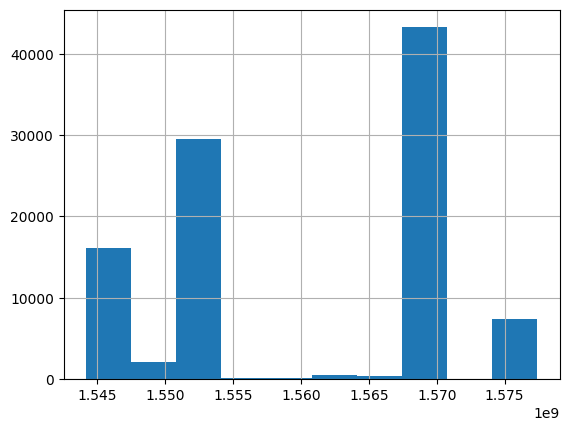

In [18]:
# print the distribution for time
rent['time'].hist()

In [19]:
# dummify fee
rent = pd.get_dummies(rent, columns=['fee'])

In [20]:
# check if any column is non-numeric
rent.dtypes[rent.dtypes == 'object']

Series([], dtype: object)

In [21]:
# visualize the longitude and latitude on a scatter plot with folium
import folium
from folium.plugins import HeatMap

# create a map
m = folium.Map(location=[rent['latitude'].mean(), rent['longitude'].mean()], zoom_start=4)

# add a heatmap
m.add_child(HeatMap(rent[['latitude', 'longitude']].values, radius=10))

# show the map
m


In [22]:
# print total count of null values
rent.isnull().sum().sum()

# drop time
rent = rent.drop(['time'], axis=1)

In [23]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(rent, test_size=0.2, random_state=7)


In [24]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)



In [27]:
# remove anomalies using isolation forest
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=7)
clf.fit(train_set)
y_noano = clf.predict(train_set)

# remove the anomalies
train_set = train_set[y_noano == 1]
train_set.shape

(79572, 3102)

In [30]:
# split the training set into X and y. Y is the target variable, price.
y_train = train_set['price']
X_train = train_set.drop(['price'], axis=1)
print(y_train.describe())

count    79572.000000
mean      1526.898972
std        892.351644
min        100.000000
25%       1012.000000
50%       1350.000000
75%       1795.000000
max      40000.000000
Name: price, dtype: float64


In [31]:
y_test = test_set['price']
x_test = test_set.drop(['price'], axis=1)

# build a random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=7)

# fit the regressor to the training set
regressor.fit(X_train, y_train)

# predict the test set
y_pred = regressor.predict(x_test)

# print the mean absolute error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

163.91749554754168


In [36]:
# print the feature importances and the corresponding column names, ranked from most important to least important
feature_importances = pd.DataFrame(regressor.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances[feature_importances['importance'] > 0.01]

,importance
square_feet,0.245405
longitude,0.185183
state_CA,0.123495
latitude,0.102484
bathrooms,0.095167
bedrooms,0.019421
cityname_East Hampton,0.016911
cityname_West Hollywood,0.014288
cityname_New York,0.010760


In [120]:
######
# Make a pipeline to automate the process
######

# Custom transformer to fill missing values
def fill_missing_values(df):
    df['amenities'] = df['amenities'].fillna('None')
    df['bathrooms'] = df['bathrooms'].fillna(0)
    df['bedrooms'] = df['bedrooms'].fillna(0)
    df['pets_allowed'] = df['pets_allowed'].fillna('None')
    df['cityname'] = df['cityname'].fillna('None')
    df['state'] = df['state'].fillna('None')
    df['address'] = df['address'].fillna('None')
    df = df.dropna(subset=['longitude', 'latitude'])
    df['price'] = df['price'].fillna(df['price'].median())

    return df


# Custom transformer to drop specific columns
def drop_columns(df):
    return df.drop(['title', 'body', 'address', 'currency', 'price_display', 'id', 'price_type'], axis=1)

In [121]:
# Custom transformer to strip a substring from the category column
def process_category(df):
    df['category'] = df['category'].str.replace('housing/rent/', '')
    return df

# modify price based on price_type
def modify_price(df):
    df.loc[df['price_type'] != 'Monthly', 'price'] = df['price'] * 4
    return df


# Custom transformer to process amenities
def process_amenities(df):
    amenities = set()
    for row in df['amenities']:
        for amenity in row.split(','):
            amenities.add(amenity.strip())

    for amenity in amenities:
        if amenity != 'None':
            df[amenity] = df['amenities'].str.contains(amenity).astype(int)


    return df.drop('amenities', axis=1)


# Custom transformer for pets_allowed
def process_pets_allowed(df):
    df['pets_cats'] = df['pets_allowed'].apply(lambda x: 'Cats' in x)
    df['pets_dogs'] = df['pets_allowed'].apply(lambda x: 'Dogs' in x)
    return df.drop('pets_allowed', axis=1)



In [125]:
# Custom transformer for dummifying specified columns
def dummify_columns(df):
    cols_to_dummify = ['category', 'has_photo', 'state', 'source', 'fee', 'cityname']
    return pd.get_dummies(df, columns=cols_to_dummify, drop_first=True)


def remove_anomalies(df):
    clf = IsolationForest(max_samples=100, random_state=7)
    clf.fit(df)
    y_noano = clf.predict(df)
    df = df[y_noano == 1]
    return df
    

# Complete pipeline with all steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


# Assembling the full pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('fill_missing_values', FunctionTransformer(fill_missing_values)),
    ('modify_price', FunctionTransformer(modify_price)),
    ('drop_columns', FunctionTransformer(drop_columns)),
    ('process_category', FunctionTransformer(process_category)),
    ('process_amenities', FunctionTransformer(process_amenities)),
    ('process_pets_allowed', FunctionTransformer(process_pets_allowed)),
    ('dummify_columns', FunctionTransformer(dummify_columns)),
    ('remove_anomalies', FunctionTransformer(remove_anomalies)),
])

In [128]:
# Testing the pipeline from start to finish
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
rent = pd.read_csv('apartment+for+rent+classified/apartments_for_rent_classified_100K.csv', sep=';', encoding='latin-1')



# build the pipeline
preprocessing_pipeline.fit(rent)

/var/folders/t3/0dl4f5vn5vz1743r9_s9hd8m0000gn/T/ipykernel_63736/3148309296.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  rent = pd.read_csv('apartment+for+rent+classified/apartments_for_rent_classified_100K.csv', sep=';', encoding='latin-1')
/var/folders/t3/0dl4f5vn5vz1743r9_s9hd8m0000gn/T/ipykernel_63736/532177841.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].fillna(df['price'].median())


Pipeline(steps=[('fill_missing_values',
                 FunctionTransformer(func=<function fill_missing_values at 0x1499656c0>)),
                ('modify_price',
                 FunctionTransformer(func=<function modify_price at 0x1494a3ba0>)),
                ('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x1494a22a0>)),
                ('process_category',
                 FunctionTransformer(func=<function process_category at 0x149987a60...
                ('process_amenities',
                 FunctionTransformer(func=<function process_amenities at 0x149d8e480>)),
                ('process_pets_allowed',
                 FunctionTransformer(func=<function process_pets_allowed at 0x149984680>)),
                ('dummify_columns',
                 FunctionTransformer(func=<function dummify_columns at 0x150afdf80>)),
                ('remove_anomalies',
                 FunctionTransformer(func=<function remove_anomalies at 0x150aff380>))])

In [129]:
df = preprocessing_pipeline.transform(rent)
df

/var/folders/t3/0dl4f5vn5vz1743r9_s9hd8m0000gn/T/ipykernel_63736/532177841.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].fillna(df['price'].median())


,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,Fireplace,Pool,Parking,...,cityname_Yucaipa,cityname_Yucca Valley,cityname_Yukon,cityname_Yulee,cityname_Yuma,cityname_Zachary,cityname_Zanesville,cityname_Zebulon,cityname_Zephyrhills,cityname_Zion
0,1.0,1.0,2195.0,542,33.8520,-118.3759,1577360355,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500,37.0867,-76.4941,1577360340,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1395.0,1650,35.8230,-78.6438,1577360332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,1600.0,820,38.3622,-121.9712,1577360330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,975.0,624,35.1038,-106.6110,1577360308,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,1.0,780.0,605,29.6151,-95.1998,1544185770,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99488,2.0,2.0,813.0,921,30.2254,-81.7579,1544185750,0,1,1,...,0,0,0,0,0,0,0,0,0,0
99489,1.0,1.0,1325.0,650,32.7379,-117.0914,1544185729,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99490,1.0,1.0,931.0,701,35.4158,-80.8451,1544185670,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# split the data into training and testing sets to avoid contamination
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

def standardize(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

model_pipeline = make_pipeline(FunctionTransformer(standardize), RandomForestRegressor())


model_pipeline.fit(X_train, y_train)

# predict the test set
y_pred = model_pipeline.predict(X_test)

# print the mean absolute error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))


252.57405263850794


In [147]:
print((y_test.values))
print((y_pred))

[ 915.  950. 1795. ... 1196. 1400. 2395.]
[ 885.51  961.68 2117.81 ... 1374.44 1435.08 1967.41]


In [151]:
# check rmse, mse, r2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 387095.17
Root mean squared error: 622.17
R2 score: 0.60


In [150]:
# print the feature importances and the corresponding column names, ranked from most important to least important
feature_importances = pd.DataFrame(model_pipeline.steps[1][1].feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances[feature_importances['importance'] > 0.01]

,importance
square_feet,0.273321
longitude,0.167233
state_CA,0.126508
latitude,0.088809
bathrooms,0.065941
time,0.065863
bedrooms,0.016595
cityname_East Hampton,0.015718
cityname_New York,0.010957


In [152]:
# only keep the columns that are in the top 10 most important features
top = feature_importances[feature_importances['importance'] > 0.01].index

# build a new pipeline with only the top 10 most important features
model_pipeline = make_pipeline(FunctionTransformer(standardize), RandomForestRegressor())
model_pipeline.fit(X_train[top], y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function standardize at 0x1555bac00>)),
                ('randomforestregressor', RandomForestRegressor())])

In [155]:
# use grid search to find the best parameters
from sklearn.model_selection import GridSearchCV

# P.S. Could not investigate this further due to time constraints on my laptop
param_grid = {
    'randomforestregressor__n_estimators': [100, 300],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, verbose=3, n_jobs=-1)

grid_search.fit(X_train[top], y_train)

# print the best parameters
grid_search.best_params_




Fitting 5 folds for each of 18 candidates, totalling 90 fits


16367.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
16367.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
16367.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
16367.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
16367.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
16367.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
16367.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
16367.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.01s - Debugger warning: It seems that frozen modules are being used,

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


16576.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[CV 1/5] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=300;, score=0.667 total time= 2.1min
[CV 2/5] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=100;, score=0.539 total time=  37.9s
[CV 3/5] END randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=100;, score=0.561 total time

17071.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[CV 1/5] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=100;, score=0.659 total time=  36.4s
[CV 2/5] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=100;, score=0.537 total time=  36.6s
[CV 3/5] END randomforestregressor__max_depth=20, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=100;, score=0.565 total time=  36

{'randomforestregressor__max_depth': None,
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__n_estimators': 300}

In [156]:
# save the best model
import joblib
joblib.dump(grid_search.best_estimator_, 'model.pkl')

['model.pkl']

In [160]:
# test the model
# model = joblib.load('model.pkl')
model = grid_search.best_estimator_

# predict the test set
y_pred = model.predict(X_test[top])

# print the mean absolute error
print("Actual Prices:", y_test.values)
print("Predicted prices:",y_pred)

Actual Prices: [ 915.  950. 1795. ... 1196. 1400. 2395.]
Predicted prices: [ 930.20061871  792.26404134 2139.9307097  ... 1528.2195026  1453.1881683
 2392.06558653]
